In [1]:
import matplotlib.pyplot as plt
from datetime import datetime, time
from dateutil.relativedelta import relativedelta
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ta, os, re, warnings
import mplfinance as mpf
from itertools import product
import numpy as np

from tqdm import tqdm

In [2]:
from src.DataUpdateModule import DataUpdateModule
from src.Strategy import Strategy
from src.DayTrade import DayTrade
DUM = DataUpdateModule(options_interval_minutes = 5)
strategy = Strategy()

## Training data

In [44]:
training_results = dict()
for x in os.listdir("./results/"):
    if x.startswith("past_mth_test") and "ranking" not in x:
        date = re.search(r"\d{4}-\d{2}", x).group(0)
        date = datetime(int(date[:4]), int(date[-2:]), 1)
        training_results[date] = pd.read_csv("./results/" + x, parse_dates = ["day"]).drop(columns = "Unnamed: 0")

In [45]:
df = pd.concat([training_results[x] for x in training_results.keys()])
df.loc[:, "month"] = df.loc[:, "day"].dt.month
df.loc[:, "year"] = df.loc[:, "day"].dt.year


Text(0.5, 1.0, 'Histogram of P&L')

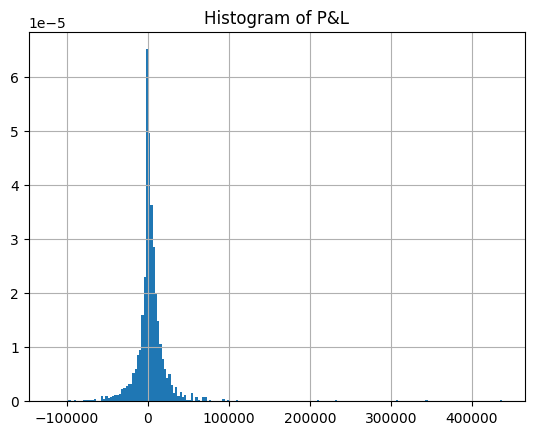

In [46]:
_ = plt.hist(df.loc[:, "pnl"], bins = 200, density = True)
plt.grid()
plt.title("Histogram of P&L")

In [47]:
cols = ['fast', 'slow_mult', 'rsi_threshold', 'opt_leg1_dollar_from_atm', 'opt_leg2_dollar_from_leg1', 'stoploss_pct_of_maxprofit', "month", "year"]

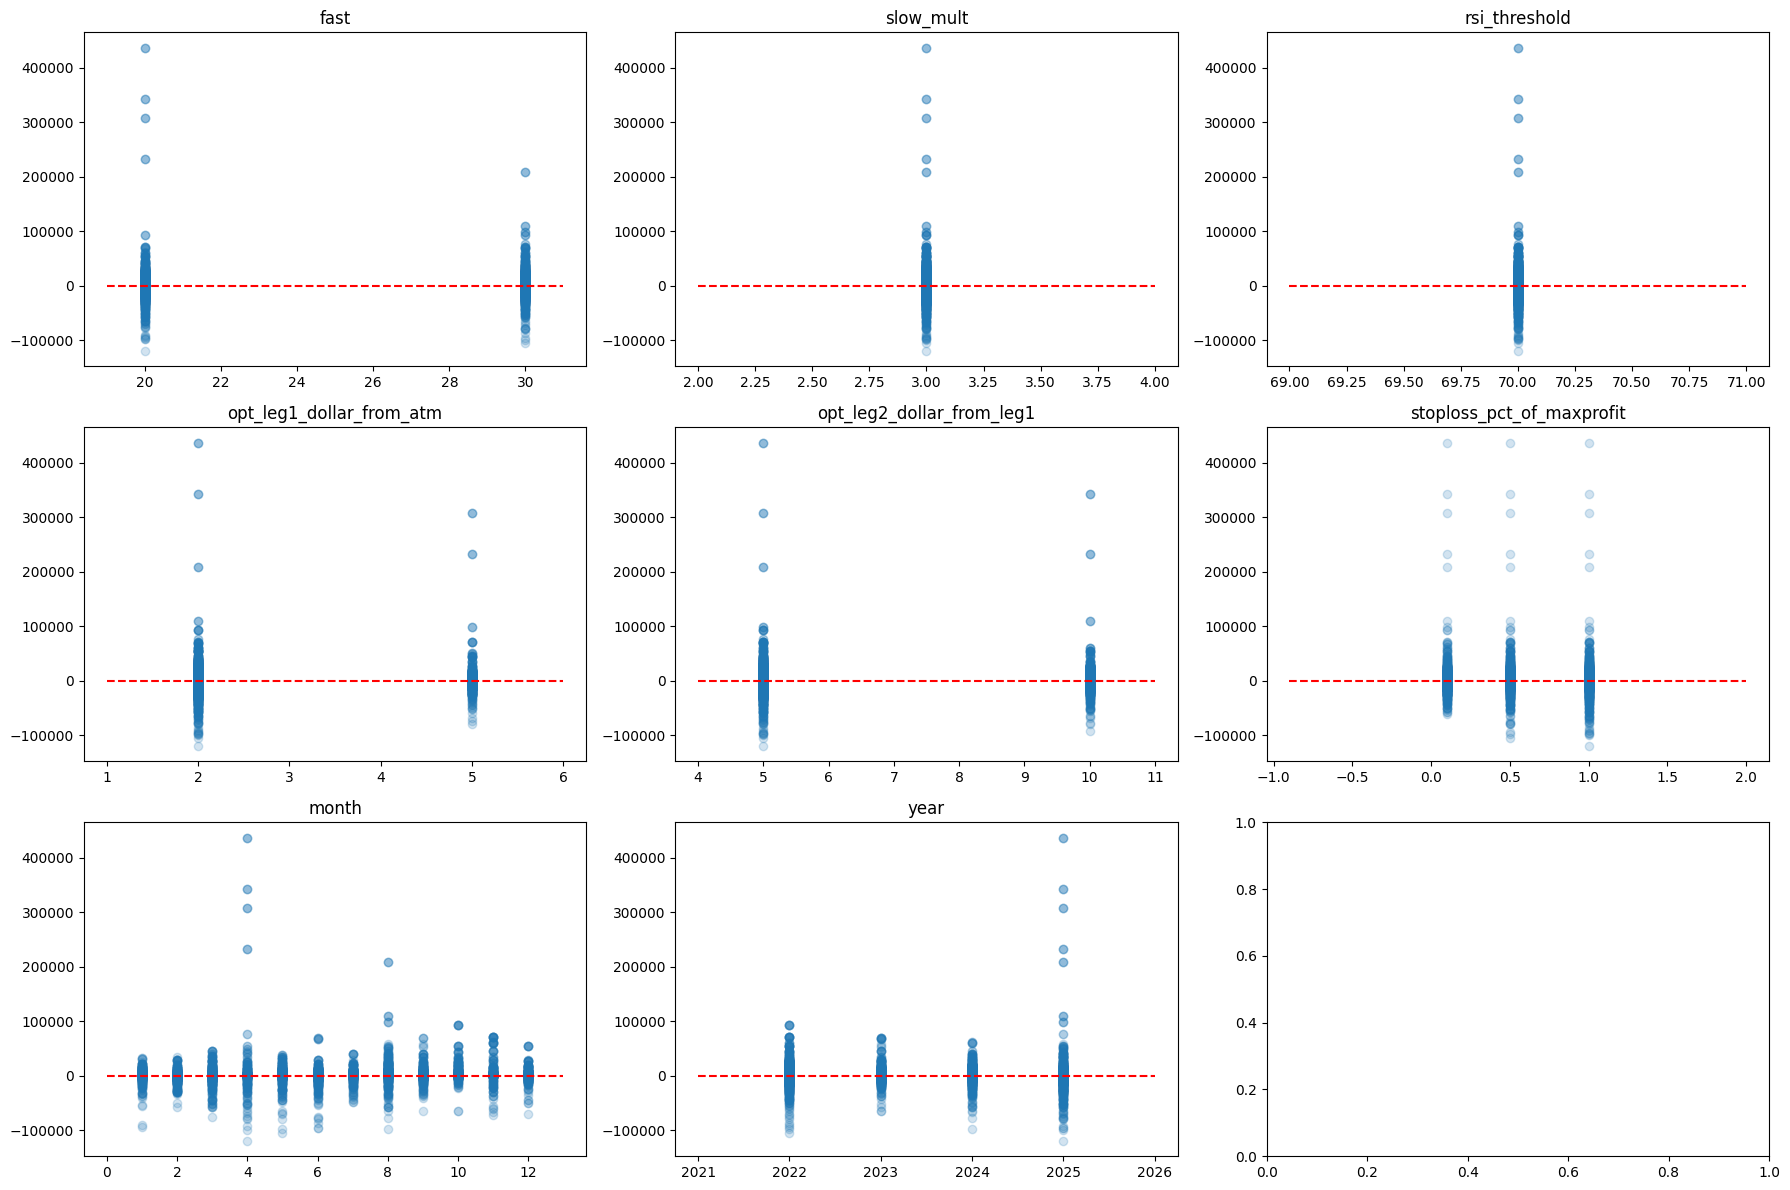

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=  3, figsize = (18,12))
for i, x in enumerate(cols):
    ax_ = ax.flatten()[i]
    ax_.scatter(df.loc[:, x], df.loc[:, "pnl"], alpha = 0.2)
    ax_.hlines(y = 0, xmin = df.loc[:, x].min()-1, xmax = df.loc[:, x].max()+1, linestyle = "--", color = "red")
    ax_.set_title(x)
fig.tight_layout()

## Traded data

In [ ]:
# max losses
# num exit criteria and stoploss by time

In [41]:
trades = pd.read_csv("./results/trade_summary.csv", parse_dates = ["day"]).drop(columns = "Unnamed: 0").set_index("day")

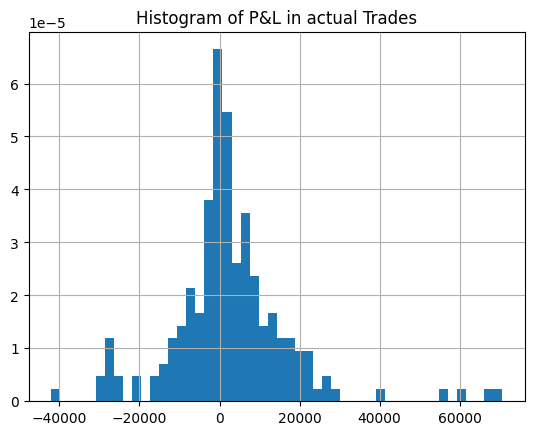

In [43]:
_ = plt.hist(trades.loc[:, "pnl"], bins = 50, density = True)
plt.title("Histogram of P&L in actual Trades")
plt.grid()

In [19]:
trades_all = pd.read_csv("./results/trading_mth_test.csv", parse_dates = ["entry_time", "exit_time"]).drop(columns = "Unnamed: 0")
trades_all.loc[:, "entry_time"] = pd.to_datetime(trades_all.loc[:, "entry_time"], utc = True)
trades_all.set_index("entry_time", inplace = True)

c:\Users\Jian\pyhome\GITHUB\options-strategy-backtest\.venv\Lib\site-packages\pandas\core\indexes\base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Text(0.5, 1.0, 'Total P&L by Exit Reason')

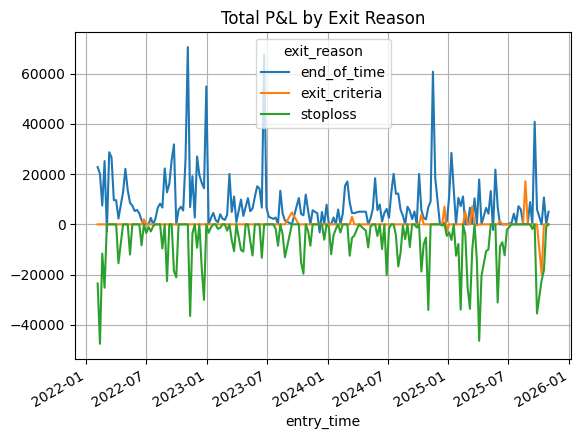

In [ ]:
trades_all.loc[:, ["exit_reason", "pnl"]].groupby([pd.Grouper("date", freq = "D"), "exit_reason"]).sum().loc[:, "pnl"].reset_index().pivot(columns = "exit_reason", values = "pnl", index = "entry_time").fillna(0).plot()
plt.grid()
plt.title("Total P&L by Exit Reason")